# Projectile motion

> Marcos Duarte  
> [Laboratory of Biomechanics and Motor Control](https://bmclab.pesquisa.ufabc.edu.br)  
> Federal University of ABC, Brazil

<div style="background-color:#F1F1F1;border:1px solid black;padding:10px;">
    <figure><img src="https://bmclab.pesquisa.ufabc.edu.br/x/salto2/jadel.gif" alt="triple jump"/><br><figcaption><center><i>Figure. Animations of a triple jump performed by athlete Jadel Gregório during training. The jump distance was 16.20 meters. The two animations are synchronized and represent the same athlete during the same jump, with the one on the left representing the athlete's movement subtracting the horizontal displacement of his center of gravity. From the website <a href="https://bmclab.pesquisa.ufabc.edu.br/analise-biomecanica-do-salto-em-distancia/">Análise do salto em distância</a>.</i></center></figcaption></figure>
</div>

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-setup" data-toc-modified-id="Python-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python setup</a></span></li><li><span><a href="#Equations-of-motion" data-toc-modified-id="Equations-of-motion-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Equations of motion</a></span><ul class="toc-item"><li><span><a href="#Time-of-flight" data-toc-modified-id="Time-of-flight-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Time of flight</a></span></li><li><span><a href="#Maximum-height" data-toc-modified-id="Maximum-height-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Maximum height</a></span></li><li><span><a href="#Range,-the-maximum-horizontal-distance" data-toc-modified-id="Range,-the-maximum-horizontal-distance-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Range, the maximum horizontal distance</a></span></li><li><span><a href="#Parabolic-trajectory" data-toc-modified-id="Parabolic-trajectory-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Parabolic trajectory</a></span></li><li><span><a href="#Release-angle-for-maximum-horizontal-distance" data-toc-modified-id="Release-angle-for-maximum-horizontal-distance-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Release angle for maximum horizontal distance</a></span></li><li><span><a href="#Release-angle-for-maximum-height" data-toc-modified-id="Release-angle-for-maximum-height-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Release angle for maximum height</a></span></li><li><span><a href="#Playing-with-projectile-motion" data-toc-modified-id="Playing-with-projectile-motion-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Playing with projectile motion</a></span></li></ul></li><li><span><a href="#Kinematics-of-the-long-jump" data-toc-modified-id="Kinematics-of-the-long-jump-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Kinematics of the long jump</a></span><ul class="toc-item"><li><span><a href="#The-different-phases-of-the-track-and-field-event-long-jump" data-toc-modified-id="The-different-phases-of-the-track-and-field-event-long-jump-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The different phases of the track and field event long jump</a></span></li><li><span><a href="#The-distance-of-flight" data-toc-modified-id="The-distance-of-flight-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>The distance of flight</a></span></li><li><span><a href="#The-optimum-angle-of-take-off" data-toc-modified-id="The-optimum-angle-of-take-off-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>The optimum angle of take off</a></span><ul class="toc-item"><li><span><a href="#Computation-of-the-optimum-angle" data-toc-modified-id="Computation-of-the-optimum-angle-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Computation of the optimum angle</a></span></li><li><span><a href="#Actual-take-off-angles-from-human-jumps-are-different-from-the-prediction" data-toc-modified-id="Actual-take-off-angles-from-human-jumps-are-different-from-the-prediction-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Actual take-off angles from human jumps are different from the prediction</a></span></li></ul></li></ul></li><li><span><a href="#On-the-calculation-of-the-angle-from-kinematic-data" data-toc-modified-id="On-the-calculation-of-the-angle-from-kinematic-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>On the calculation of the angle from kinematic data</a></span></li><li><span><a href="#Problems" data-toc-modified-id="Problems-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Problems</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

Projectile or ballistic motion is the movement of a body in the air near Earth's surface where the main force acting on the body is the gravitational force. If we neglect the air resistance and approximate the gravity force (which acts only at the vertical direction) on the body as constant, the body will have constant velocity at the horizontal direction and constant acceleration (the gravitational acceleration) at the vertical direction.

## Python setup

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
if "google.colab" in sys.modules:
    %pip install -q ipympl
    %matplotlib widget
    from google.colab import output
    output.enable_custom_widget_manager()

## Equations of motion

Let's deduce the equations for a projectile motion and investigate their characteristics. For simplicity, let's consider for now a planar movement, neglect the air resistance, and the gravitational acceleration, $g=9.8 m/s^2$. Consider a body (which will treat it as a particle) launched to the air with initial angle $\theta$ with respect to the horizontal (the $\mathbf{x}$ direction) and initial velocity $\mathbf{v_0}$, a vector quantity with components $v_{0x}=v_0\cos(\theta)$ and $v_{0y}=v_0\sin(\theta)$.  
The equations of motion for position ($x, y$), velocity $v_x, v_y$, and acceleration $a_x, a_y$ are:  
<br>
<span class="notranslate">
\begin{align}
& x(t) = x_0 + v_0\cos(\theta)\:t \\
& y(t) = y_0 + v_0\sin(\theta)\:t - \frac{g\:t^2}{2} \\
& v_x(t) = v_0\cos(\theta) \\
& v_y(t) = v_0\sin(\theta) - g\:t \\
& a_x(t) = 0 \\
& a_y(t) = -g
\label{eq_1}
\end{align}
</span>

### Time of flight

The time of flight can be calculated from the equation for the vertical velocity and using the properties that at the maximum height, the vertical velocity is zero and the time of rising is equal to the time of falling:  
<br>
<span class="notranslate">
\begin{equation}
t_{flight} = \frac{2v_0\sin(\theta)}{g}
\label{tflight}
\end{equation}
</span>

### Maximum height

Using the value for time of flight we just calculated and once again the fact the at the maximum height the body has zero vertical velocity, the maximum height, $h$, can be obtained from the equation for the vertical position:  
<br>
<span class="notranslate">
\begin{equation}
h = \frac{v_0^2\sin^2(\theta)}{2g}
\label{maxheight}
\end{equation}
</span>

### Range, the maximum horizontal distance

The range, $R$, is the maximum horizontal distance reached with respect to the point of release:  
<br>
<span class="notranslate">
\begin{equation}
R = v_0\cos(\theta)\:t_{flight}
\label{range}
\end{equation}
</span>

Substituting the expression for $t_{flight}$:  
<br>
<span class="notranslate">
\begin{equation}
R = \frac{v_0^2\sin(2\theta)}{g}
\label{range2}
\end{equation}
</span>


### Parabolic trajectory

The equation for the horizontal position versus time is the equation of a straight line and for the vertical position is the equation of a parabola. We can prove that the spatial trajectory (the vertical position versus the horizontal position) is also a parabola if we use the two equations for position and eliminate the variable time:

<span class="notranslate">
\begin{equation}
y = y_0 + \tan(\theta)(x-x_0) - \frac{g}{2v_0^2cos^2(\theta)}(x-x_0)^2
\label{eq_5}
\end{equation}
</span>

Since $y_0,\: x_0,\: \theta,\: v_0,\: g$ are constants, this is an equation for a parabola.

### Release angle for maximum horizontal distance

From the expression for the range, we note that the maximum value is reached when $\sin(2\theta)=1$ which gives $\theta=45^o$.

### Release angle for maximum height

From the expression for the maximum height, we note that the maximum value is reached when $\sin^2(\theta)=1$ which gives $\theta=90^o$.

### Playing with projectile motion
Here is an interactive animation of a projectile motion where you can change the initial angle and speed of the body (or to start, simply press the button *Fire* in the rectangular menu):

In [2]:
from IPython.display import IFrame
IFrame('https://phet.colorado.edu/sims/html/projectile-motion/latest/projectile-motion_en.html',
       width='100%', height=500)

## Kinematics of the long jump

We can study the kinematics of jumps by humans and other animals as projectile motions with the equations of motion we derived if we consider the body as a particle. There is a particular point in the body (a virtual point) that will strictly follow the equations of motion we derived. This point is called center of mass or center of gravity and represents an average position of all the masses in the body. We will study this later; for now just consider that when applying the equations for projectile motion to a body with many particles, we are in fact describing the motion of its center of mass.

### The different phases of the track and field event long jump

The track and field event long jump has some particularities we must consider to analyze it as a projectile motion; the figure below shows the kinematic characteristics relevant for this analysis.  
<br>
<figure><img src="https://github.com/BMClab/BMC/blob/master/images/longjump.png?raw=1" alt="longjump"/><figcaption><center><i>Figure. Diagram of a long jump and its kinematic characteristics. The red circle represents the center of mass of the jumper. Adapted from Linthorne (2007).</i></center></figcaption></figure>

The distance officially considered as the jump distance, $d_{jump}$, can be described as the sum of three distances as indicated in the previous figure:  
<br>
<span class="notranslate">
\begin{equation}
d_{jump} = d_{take-off} + d_{flight} + d_{landing}
\label{eq_6}
\end{equation}
</span>

### The distance of flight

The jump in the air is the part of the jump that we can describe as a projectile motion and its distance, $d_{flight}$, is typically 90% of the jump distance for professional jumpers.  

Let's derive an expression for $d_{flight}$, which we called range before, as a function of the velocity and angle at the take-off. Looking at the long jump diagram, we see that the jumper takes off from a higher height than when he or she lands. The equation for the vertical displacement of the jumper's center of mass during the flight phase will be:  
<br>
<span class="notranslate">
\begin{equation}
h_{landing} = h_{take-off} + v_0\sin(\theta)\:t - \frac{g\:t^2_{flight}}{2}
\label{eq_7}
\end{equation}
</span>

For simplicity let's adopt $h_0=h_{take-off}-h_{landing}$:  
<br>
<span class="notranslate">
\begin{equation}
0 = h_0 + v_0\sin(\theta)\:t - \frac{g\:t^2_{flight}}{2}
\label{eq_8}
\end{equation}
</span>

Solving this second-order equation for $t_{flight}$:  
<br>
<span class="notranslate">
\begin{equation}
t_{flight} = \frac{v_0 \sin(\theta) \pm \sqrt{v^2_0 \sin^2(\theta) + 2 h_0 g}}{g}
\label{eq_9}
\end{equation}
</span>

This expression is different than the one we derived before because the initial and final heights are different in the long jump. However, the above expression reduces to the former expression when this difference is zero, $h_0=0$.

We are only interested in the positive solution of the equation (the negative solution results in negative time) and substituting this result in the equation for the horizontal distance, we have the an expression for $d_{flight}$:  
<br>
<span class="notranslate">
\begin{equation}
d_{flight} = \frac{v_0\cos(\theta)\left[v_0 \sin(\theta) + \sqrt{v^2_0\sin^2(\theta) + 2 h_0 g}\:\right]}{g} \label{eq_10}
\end{equation}
</span>

Once again, when $h_0=0$, we have the same expression we derived before.

### The optimum angle of take off

We now can find the angle that maximizes the range given that the projectile is released (the body jumps) from an initial height. In order to find such angle, we differentiate the previous equation with respect to the variable angle, set this derivative equal to zero, and solve it (read about how to find maxima points in a function [here](http://en.wikipedia.org/wiki/Maxima_and_minima)). It can be shown that the solution is (for a proof, see [here](http://math.stackexchange.com/questions/127300/maximum-range-of-a-projectile-launched-from-an-elevation) or [here](http://www.themcclungs.net/physics/download/H/2_D_Motion/Projectile%20Cliff.pdf)):  
<br>
<span class="notranslate">
\begin{equation}
\theta = \arctan\left(\frac{v_0}{\sqrt{v_0^2 + 2gh_0}}\right)
\label{eq_11}
\end{equation}
</span>

For $h_0=0$, the angle will be $\arctan(1)$, which is equal to $45^o$, as obtained before. However, higher the height, smaller than one the fraction and smaller will be the optimum angle.

#### Computation of the optimum angle

Let's write a function to calculate the optimum angle given the initial height and velocity:

In [3]:
def angle(height, velocity):
    '''Opitmum angle for projectile motion with initial `height` and `velocity`.
    '''
    import math

    g = 9.8  # gravitational acceleration, m/s2

    ang = 0
    if velocity != 0:
        ang = math.atan(velocity/math.sqrt(velocity**2+2*g*height))*180/math.pi

    return ang

Let's determine the optimum angle for an initial height of 0.6 m and an initial velocity of 9 m/s (actual values for athletes of long jump):

In [4]:
height=.6
velocity=9
ang = angle(height, velocity)
print('The optimum angle for a jump with h=%.1f m and v=%.1f m/s is %.1f degrees'
          %(height, velocity, ang))

The optimum angle for a jump with h=0.6 m and v=9.0 m/s is 43.1 degrees


We can even plot the optimum angle for different values of initial height and velocity (e.g., heights from 0 to 1 m and velocities from 5 to 10 m/s):

In [5]:
# import and configure additional libraries
from matplotlib import cm
import seaborn as sns
sns.set(rc={'axes.facecolor': 'white', 'figure.facecolor': 'white'})
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2, "lines.markersize": 10})

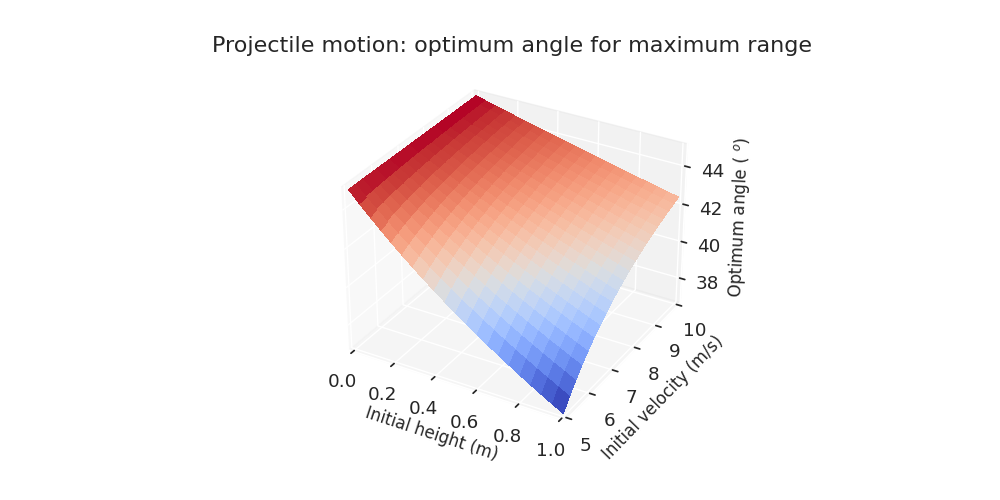

In [6]:
angles = np.zeros((21, 21))
for h in range(0, 21):
    for v in range(0, 21):
        angles[h, v] = angle(height=h/20, velocity=v/4+5)

v, h = np.meshgrid(np.arange(5, 10.25, .25), np.arange(0, 1.05, 0.05))

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(h, v, angles, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlim(0, 1)
ax.set_ylim(5, 10)
ax.set_zlim(np.min(angles), 45)
ax.set_xlabel('Initial height (m)', fontsize=12)
ax.set_ylabel('Initial velocity (m/s)', fontsize=12)
ax.set_zlabel('Optimum angle ( $^o$)', fontsize=12)
ax.set_title('Projectile motion: optimum angle for maximum range', fontsize=16)
plt.show()

#### Actual take-off angles from human jumps are different from the prediction

The typical angles of take-off among the athletes vary between 15$^o$ and 27$^o$ (Linthorne, 2007), much lower than we predicted! Neither the Physics or the simplifications we adopted are wrong.  

It happens that humans are unable to run at the horizontal direction with a speed of 10 m/s and suddenly change their direction to 45$^o$ without losing a large amount of that speed. The contact time of the foot with the ground just before jumping for an athlete of long jump is about 10 ms. Our muscles don't have the capacity to act fast enough and generate the necessary amount of force in such short time.  

But don't think then the physics of projectile motion is useless for understanding the jumps by humans, quite the contrary. It is possible to model the mechanical and physiological properties of the human body and simulate a long jump (using the equations of projectile motion) which will reproduce most of the long jump characteristics, see for example, Alexander (1990) and Seyfarth et al. (2000). We can even use this kind of modeling to simulate what would happen if the athlete changes some of his or her technique.

See experimental values for the kinematic properties of long jumps measured during competitions in the websites [Research Projects](http://www.iaaf.org/development/research) (from the International Association of Athletics Federations) and [Análise Biomecânica do Salto em Distância](http://demotu.org/x/salto/) (in Portuguese).

## On the calculation of the angle from kinematic data

The angle of the projectile with the horizontal (in the context of a human jump, the angle of the trajectory of the center of gravity with the horizontal in the sagittal plane) at a given instant (e.g. at the take-off of the jump) is, by definition, the arc. whose tangent is the ratio of the vertical ($y$) and horizontal ($x$) displacements:

<div class='center-align'><figure><img src="https://github.com/BMClab/BMC/blob/master/images/segment.png?raw=1" width=250/><figcaption><figcaption><center><i>Figure. A segment in a plane and its coordinates.</i></center></figcaption> </figure></div>
    
Given the the coordinates at two instants:   
<br>
<span class="notranslate">
\begin{equation}
\theta = arctan\left(\frac{y_2-y_1}{x_2-x_1}\right)
\end{equation}
</span>
    
A simple way to determine the angle with experimental data, rather than calculating the finite differences in position in the two directions, is to calculate the angle from the ratio of the vertical and horizontal velocities, $v(t)$, since:   
<br>
<span class="notranslate">
\begin{equation}
\theta(t) = arctan\left(\frac{v_y(t)}{v_x(t)}\right) = arctan\left(\dfrac{\dfrac{y_{t}-y_{t-1}}{\Delta t}}{\dfrac{x_{t}-x_{t-1}}{\Delta t}}\right) = arctan\left(\frac{y_{t}-y_{t-1}}{x_{t}-x_{t-1}}\right)
\end{equation}
</span>    

## More examples

 - [Horizontally Launched Projectiles - Problem-Solving](https://www.physicsclassroom.com/class/vectors/Lesson-2/Horizontally-Launched-Projectiles-Problem-Solving)  
 - [Non-Horizontally Launched Projectiles - Problem-Solving](https://www.physicsclassroom.com/class/vectors/Lesson-2/Non-Horizontally-Launched-Projectiles-Problem-Solv)

## Further reading

 - Read the text: Linthorne NP (2007) <a href="http://www.brunel.ac.uk/~spstnpl/Publications/Ch24LongJump(Linthorne).pdf">Biomechanics of the long jump</a>. In Routledge Handbook of Biomechanics and Human Movement Science, Y. Hong and R. Bartlett (Editors), Routledge, London. pp. 340–353.

## Video lectures on the Internet

 - Khan Academy: [Two-dimensional motion](https://www.khanacademy.org/science/ap-physics-1/ap-two-dimensional-motion)  

## Problems

1. An athlete during a long jump had at the moment of takeoff a velocity of (8.10, 3.58, 0) [in m/s] where $\mathbf{x, y, z}$ are the horizontal (anterior-posterior), vertical, and medio-lateral directions, respectively.     
   a. Calculate the magnitude of the velocity at the takeoff.   
   b. Calculate the angle of the jump at the takeoff.   
   c. Calculate the jump distance.   
   d. The actual jump distance was 6.75 m. Comment about the difference between this value and the distance found in (c).  

2. A person throws a ball upward (vertically) into the air with an initial speed of 10 m/s and initial height of release of 2 m. Determine the following quantities for the ball:  
   a. Maximum height.  
   b. Total time in the air.  
   c. Velocity just before impact with the ground.  
   d. Plots for position, velocity, and acceleration.  

3. An athlete of diving jumps from a 10-m height platform and reaches the water at a horizontal distance of 5 m after 2.5 s. Calculate the following quantities for the diver's center of mass:  
   a. Initial speed and angle at the takeoff.  
   b. Maximum height reached.
   
4. A ball is thrown with a speed $v_0=25$ m/s and angle $\theta=tan^{-1}(4/3)$ strikes the inclined surface as shown in the figure below. Determine the position s at which the ball will strike the inclined surface. Solution: s=40.04m.
<br>
<figure><img src="https://github.com/BMClab/BMC/blob/master/images/ex1_12_rade.png?raw=1" width=400/></figure>  
<br>  
4. Investigate and propose at least three different methods to measure these kinematic quantities during training and sporting events. Discuss the limitations and advantages of each method considering their application in different sports.

5. The website [Physics Classroom](https://www.physicsclassroom.com/curriculum/vectors/Projectile-Motion) has a link to a pdf document with 26 problems about projectile motion and links to the lessons about this topic. Download the pdf and solve the problems.

## References

- Alexander RM (1990) [Optimum take-off techniques for high and long jumps](http://rstb.royalsocietypublishing.org/cgi/pmidlookup?view=long&pmid=1976267). Philosophical transactions of the Royal Society of London. Series B, Biological sciences. 329(1252), 3-10.
- [Análise Biomecânica do Salto em Distância](http://demotu.org/x/salto/)
- Linthorne NP (2007) <a href="http://www.brunel.ac.uk/~spstnpl/Publications/Ch24LongJump(Linthorne).pdf">Biomechanics of the long jump</a>. In Routledge Handbook of Biomechanics and Human Movement Science, Y. Hong and R. Bartlett (Editors), Routledge, London. pp. 340–353.
- [Research Projects](http://www.iaaf.org/development/research) from the International Association of Athletics Federations.
- Seyfarth A, Blickhan R, Van Leeuwen JL (2000) [Optimum take-off techniques and muscle design for long jump](http://jeb.biologists.org/cgi/pmidlookup?view=long&pmid=10648215). Journal of Experimental Biology, 203(Pt 4), 741-50.
